# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 1384 Тапеха Владимир Алексеевич и Лукин Евгений Юрьевич. Вариант №9.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования. 

## Основные теоретические положения

1. **Дискретный прямоугольный импульс**:  
$$ 
    s_1(k) = \begin{cases} 
                U,\ n_0 \leq k \leq n0 + n_{\text{imp}} - 1 \\ 
                0,\ \text{otherwise} 
            \end{cases} 
$$
где U - амплитуда импульса, $ n_0 $ - начальный момент импульса, $ n_{\text{imp}} $ - длина импульса.

---
2. **Дискретный гармонический сигнал с экспоненциальной огибающей** $ |a|^k $: $$ s(k) = C \cos( \hat{w_0} k ) \cdot |a|^k $$ 
где a - основание экспоненты, C - амплитуда гармонического сигнала, $ \hat{w_0} $ - частота гармонического сигнала.

---
3. **Энергия сигнала**: 
$$ 
    E = \int_{0}^{T} s^2(t) dt 
$$
Для дискретного случая формула примет следующий вид: 
$$
    E = \sum_{i=0}^{T} s^2(t)
$$

---
4. **Средняя мощность сигнала**: 
$$ 
    P_{ср} = \frac{1}{T} \int_{0}^{T} s^2(t) dt 
$$
Для дискретного случая формула примет следующий вид: 
$$
    E = \frac{1}{T} \sum_{i=0}^{T} s^2(t)
$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами. 

## Выполнение работы

Импорт необходимых библиотек.

In [93]:
import numpy as np
import matplotlib.pyplot as plt

Вынесем все константы и вычислим их исходя из варианта.

In [94]:
Nb = 9
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
U = Nb % 20 + 1

n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5

B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)

a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5


Напечатаем все вычисленные константы

In [95]:
print(f"Номер бригады\t\t\t\tNb = {Nb}")
print(f"Длина последовательности\t\tN = {N}")
print(f"Основание экспоненты\t\t\ta = {a}")
print(f"Амплитуда гармонического сигнала\tC = {C}")
print(f"Частота гармонического сигнала\t\tw0 = {w0}")
print(f"Амплитуда импульса\t\t\tU = {U}")
print(f"Начальный момент импульса\t\tn0 = {n0}")
print(f"Длина импульса\t\t\t\tn_imp = {n_imp}")

print(f"Амплитуда гармонического сигнала\tB1 = {B1}")
print(f"Амплитуда гармонического сигнала\tB2 = {B2}")
print(f"Амплитуда гармонического сигнала\tB3 = {B3}")

print(f"Частота гармонического сигнала\t\tw1 = {w1}")
print(f"Частота гармонического сигнала\t\tw2 = {w2}")
print(f"Частота гармонического сигнала\t\tw3 = {w3}")

print(f"Коэфф. линейной комбинации гармонических сигналов\ta1 = {a1}")
print(f"Коэфф. линейной комбинации гармонических сигналов\ta2 = {a2}")
print(f"Коэфф. линейной комбинации гармонических сигналов\ta3 = {a3}")

Номер бригады				Nb = 9
Длина последовательности		N = 34
Основание экспоненты			a = -0.8450000000000001
Амплитуда гармонического сигнала	C = 5
Частота гармонического сигнала		w0 = 0.3141592653589793
Амплитуда импульса			U = 10
Начальный момент импульса		n0 = 7
Длина импульса				n_imp = 9
Амплитуда гармонического сигнала	B1 = 5.5
Амплитуда гармонического сигнала	B2 = 1.7000000000000002
Амплитуда гармонического сигнала	B3 = 6.2
Частота гармонического сигнала		w1 = 0.39269908169872414
Частота гармонического сигнала		w2 = 0.2617993877991494
Частота гармонического сигнала		w3 = 0.15707963267948966
Коэфф. линейной комбинации гармонических сигналов	a1 = -2.5
Коэфф. линейной комбинации гармонических сигналов	a2 = 4.7
Коэфф. линейной комбинации гармонических сигналов	a3 = 5.4


### Задание 1.

### Задание 1.
Смоделировать дискретный прямоугольный импульс: 
$$ 
    s_1(k) = \begin{cases} 
            U,\ n_0 \leq k \leq n_0 + n_{\text{imp}} - 1 \\ 
            0,\  \text{otherwise} \end{cases} 
$$

На основе дискретного единичного скачка $ \sigma_{d}(k) $ из л/р №1 с выводом графика на интервале времени $ n \in [0, N-1] $. Пояснить как выполняется моделирование импульса.

**Пояснение:<br>**
Для моделирования ДПИ (дискретного прямоугольного импульса) воспользуемся функцией дискретного единичного скачка $ \sigma_{d}(k), $ которая умножается на амплитуду импульса при $ n_0 \leq k \leq n_0 + n_{\text{imp}} - 1.$ Для рассматриваемого варианта задания, получим, что 

$$ 
    s_1(k) = \begin{cases} 
                10,\ 7 \leq k \leq 15, \\ 
                0,\  \text{otherwise}. 
            \end{cases} 
$$

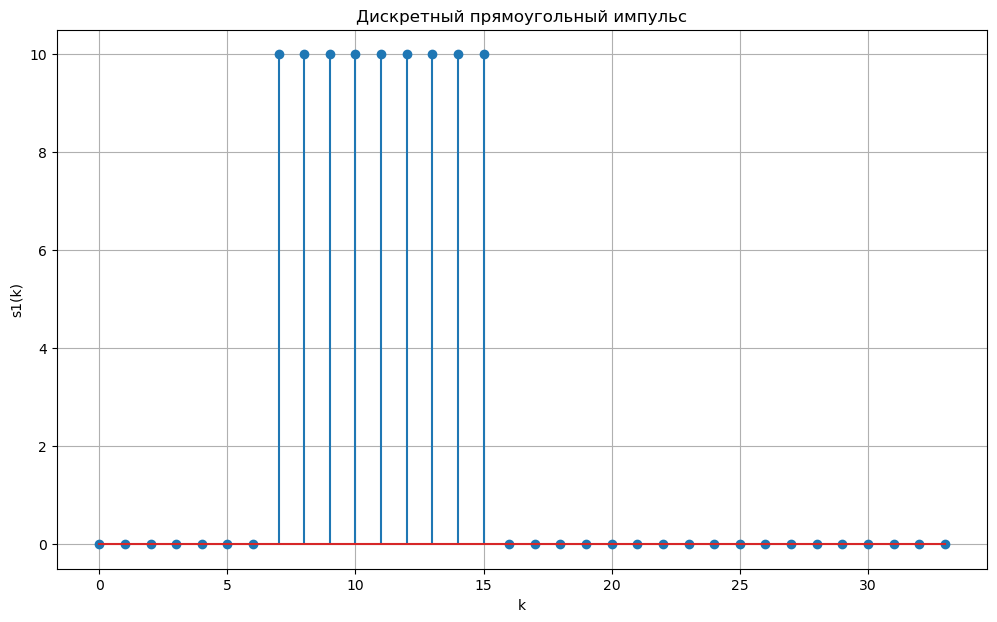

In [96]:
n_int = np.arange(N)
s1 = list(map(lambda k: U if n0 <= k <= n0 + n_imp - 1 else 0, n_int))

plt.figure(figsize=(12,7))
plt.stem(n_int, s1)
plt.xlabel('k')
plt.ylabel('s1(k)')
plt.title('Дискретный прямоугольный импульс')
plt.grid(True)
plt.show()

### Задание 2.
Смоделировать линейную комбинацию дискретных гармонических сигналов:
$$ 
    s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k), 
$$
где 
$$ 
    x_i(k) = B_i \sin ( \hat{w_i} k ), \quad i = 1, 2, 3, ... 
$$
с выводом графиков последовательностей $ x_i(k) $ и $ s_2(k) $ на интервале времени $ n \in [0, 5N - 1] $. Вычислить среднее значение (идентификатор mean_s2), энергия (идентификатор E) и среднюю мощность последовательности $ s_2(k) $ (идентификатор P). 

Пояснить:

a. операции при моделировании линейной комбинации сигналов $ s_2(k) $;

b. как определяют указанные характеристики.

**Пояснение п.а:<br>**

Для моделирования линейной комбинации сигналов $ s_2(k) $ на интервале времени $ n \in [0,\ 5N - 1],$ сначала вычисляются $ x_i(k), $ равные $ B_i\sin(\hat{w_i}k),$ на заданном интервале времени. 

Итоговый сигнал $ s_2(k) $ вычисляется как $ \sum_{i=1}^{3} a_i \cdot x_i(k), $ где $ a_i $ коэффициенты линейной комбинации. 

Для решаемого варианта коэффициенты $a_1,\ a_2,\ a_3$ соответственно равны -2.5, 4.7, 5.4.

In [108]:
n_int = np.arange(5 * N)
x1 = B1 * np.sin(w1 * n_int)
x2 = B2 * np.sin(w2 * n_int)
x3 = B3 * np.sin(w3 * n_int)

s2 = a1 * x1 + a2 * x2 + a3 * x3

Построим графики каждой из компонент линейной комбинации, а также график полученного сигнала:

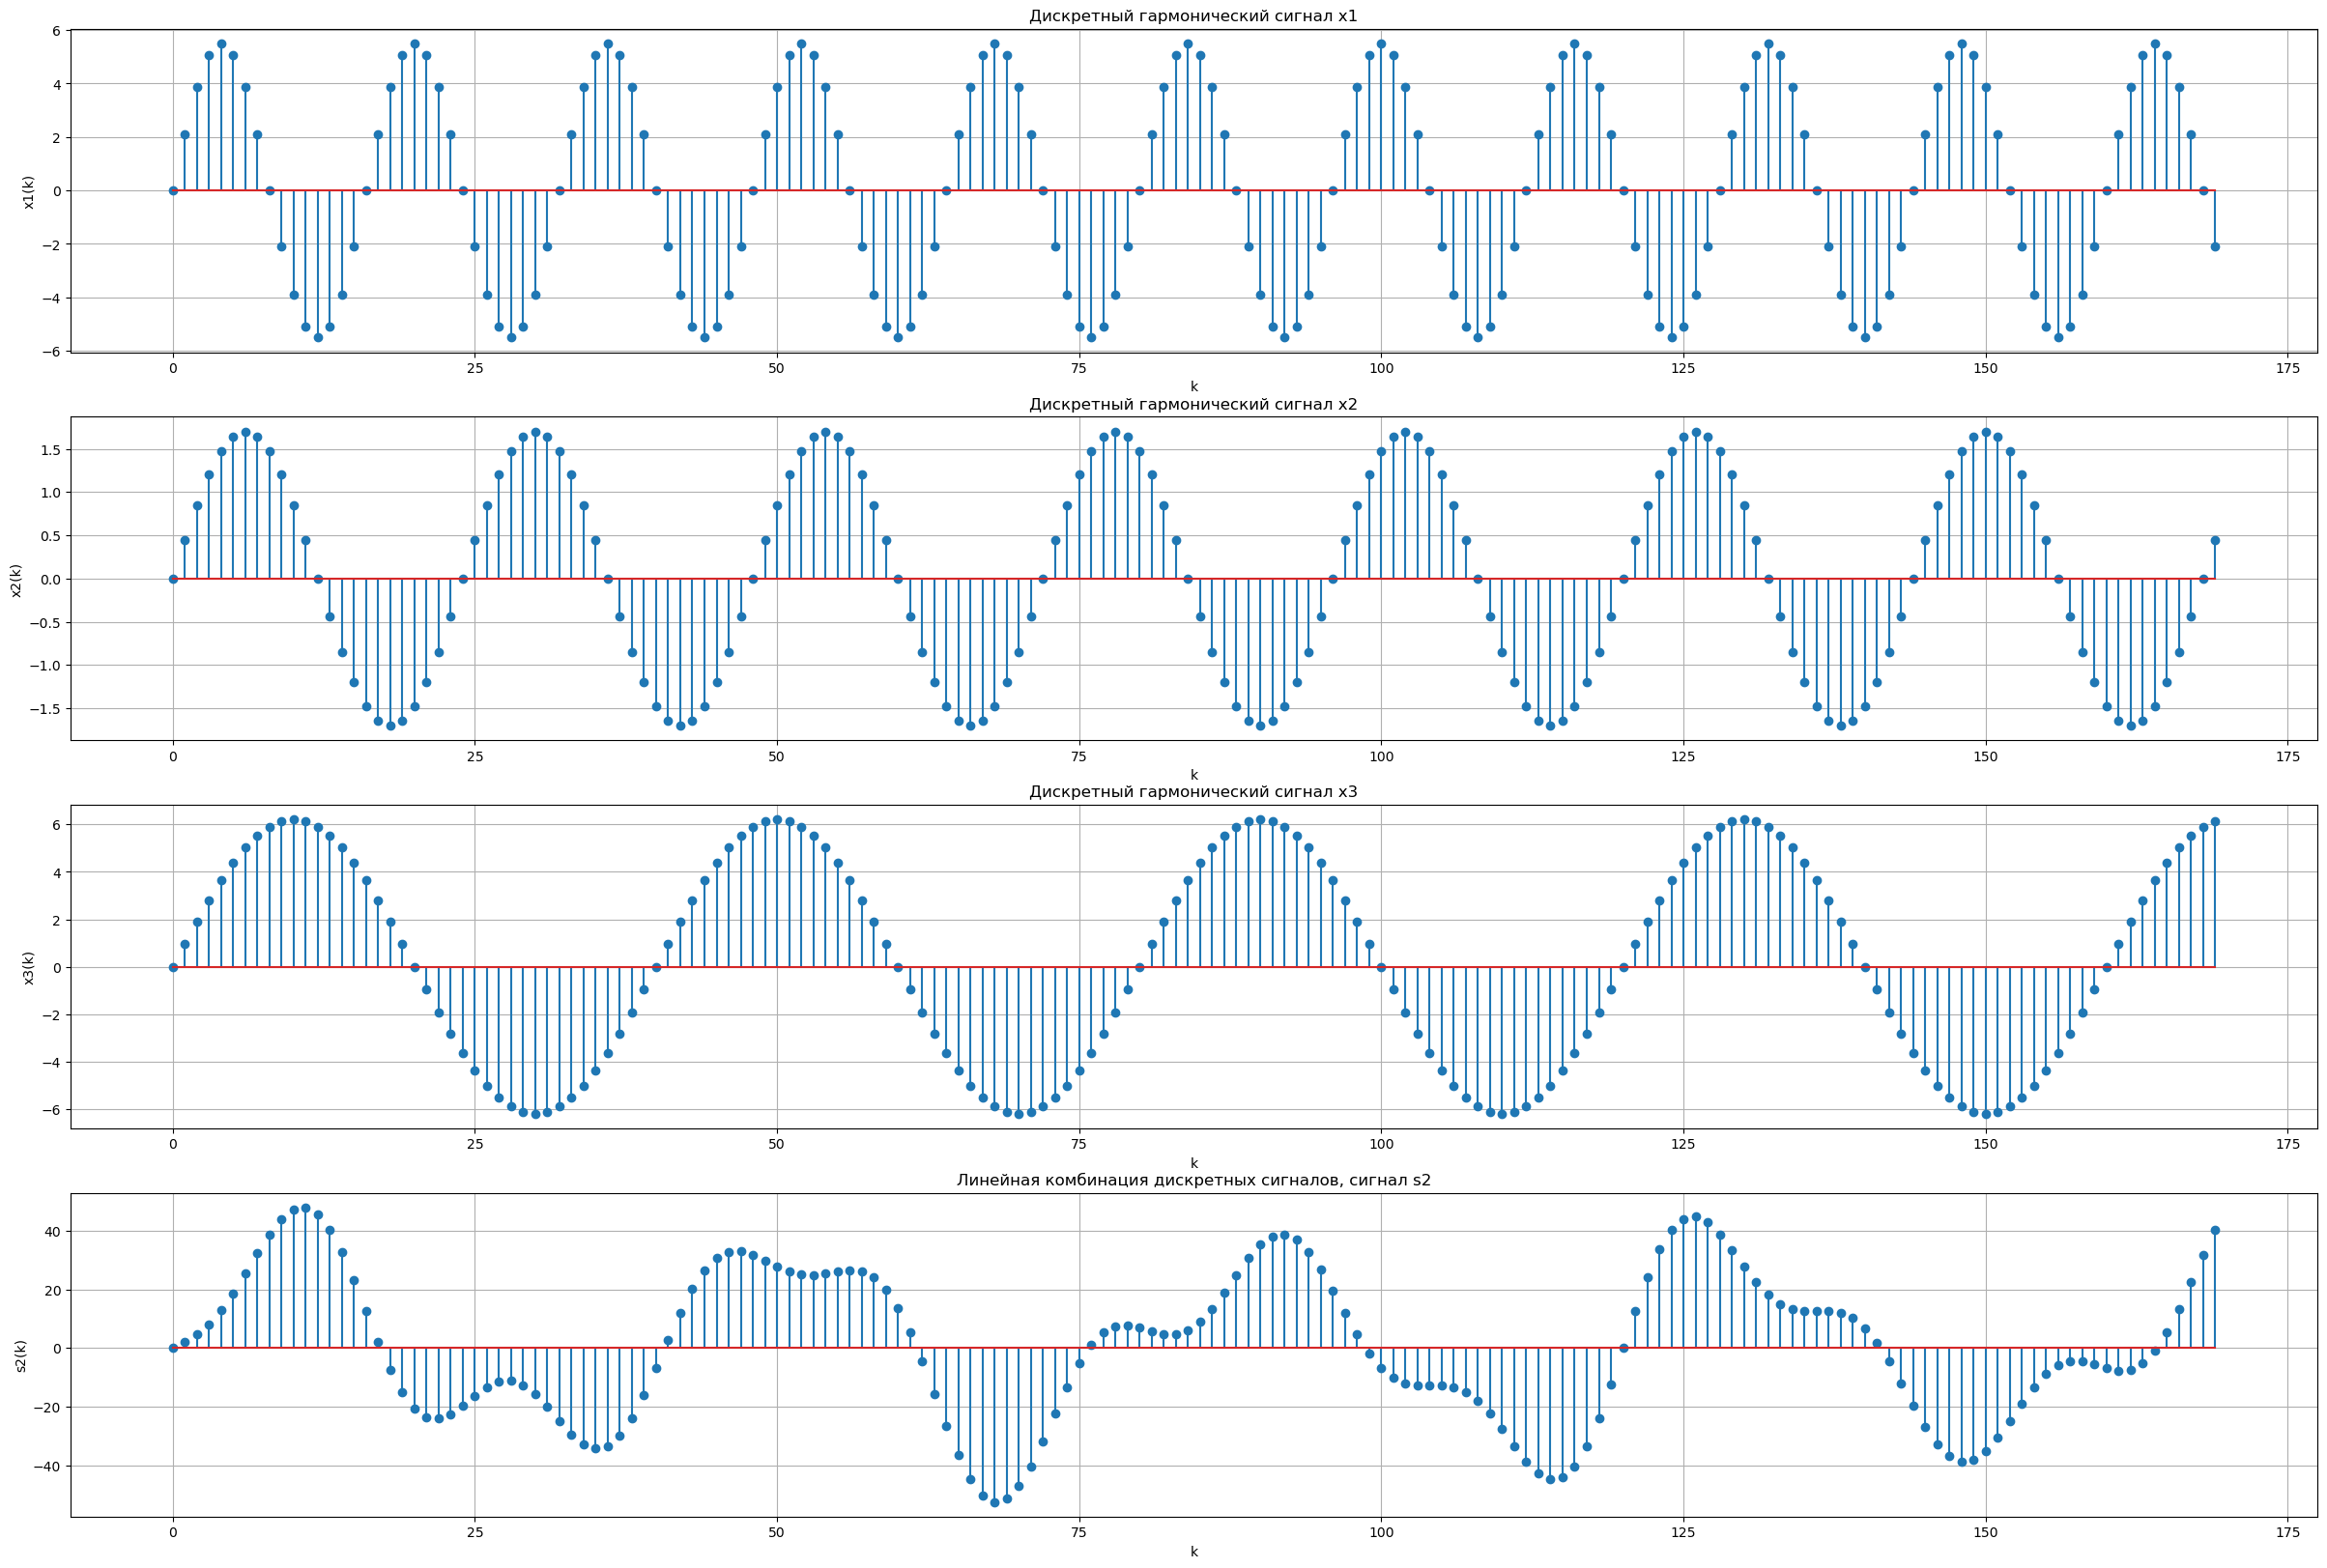

In [109]:
plt.figure(figsize=(30,20))

plt.subplot(4,1,1)
plt.stem(n_int, x1)
plt.title("Дискретный гармонический сигнал x1")
plt.xlabel("k")
plt.ylabel("x1(k)")
plt.grid(True)

plt.subplot(4,1,2)
plt.stem(n_int, x2)
plt.title("Дискретный гармонический сигнал x2")
plt.xlabel("k")
plt.ylabel("x2(k)")
plt.grid(True)

plt.subplot(4,1,3)
plt.stem(n_int, x3)
plt.title("Дискретный гармонический сигнал x3")
plt.xlabel("k")
plt.ylabel("x3(k)")
plt.grid(True)

plt.subplot(4,1,4)
plt.stem(n_int, s2)
plt.title("Линейная комбинация дискретных сигналов, сигнал s2")
plt.xlabel("k")
plt.ylabel("s2(k)")
plt.grid(True)

**Пояснение п.b:<br>**
1. Среднее значение *mean_s2* вычисляется как среднее арифметическое значение $s_2$ на указанном временном интервале.
2. Энергия сигнала *E* вычисляется как сумма мощностей сигналов в каждом из отсчетов, то есть как сумма квадратов значений на рассматриваевом интервале времени:
$$
    E = \sum_{k=0}^{n}s^2(k).
$$
3. Средняя мощность последовательности *P* вычисляется как среднее арифметическое мощностей в каждом из отсчетов на заданном временном интервале, или же как отношение энергии сигнала к длине временного интервала:
$$
    P = n^{-1}\sum_{k=0}^{n}s^2(k) = \frac{E}{n}.
$$


In [99]:
mean_s2 = np.mean(s2)
E = np.sum(s2**2)
P = E / len(s2)

print(f"Среднее значение:\t\t\tmean_s2 = {mean_s2}")
print(f"Энергия сигнала:\t\t\tE = {E}")
print(f"Средняя мощность последовательности:\tP = {P}")

Среднее значение:			mean_s2 = 0.789210650777783
Энергия сигнала:			E = 110847.78920679263
Средняя мощность последовательности:	P = 652.045818863486


### Задание 3.
Вывести график дискретного сигнала $ s_3(k) $ представляющего собой дискретный гармонический сигнал s(k): $$ s(k) = C \cos( \hat{w_0} k ) $$
с экспоненциальной огибающей $ |a|^k $ на интервале времени $ n \in [0, N-1] $. Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.

**Пояснение:<br>**
Аналитическая форма дискретного гармонический сигнала с экспоненциальной огибающей $ |a|^k $: 
$$ 
    s_3(k) = C \cos( \hat{w_0} k ) \cdot |a|^k. 
$$ 
При моделировании дискретного гармонического сигнала с экспоненциальной огибающей сначала расчитываются значения самого дискретного сигнала, затем расчитываются значения экспоненциальнной огибающей, а итоговый сигнал получается как произведение частей в соответствующих точках из указанного интервала времени.

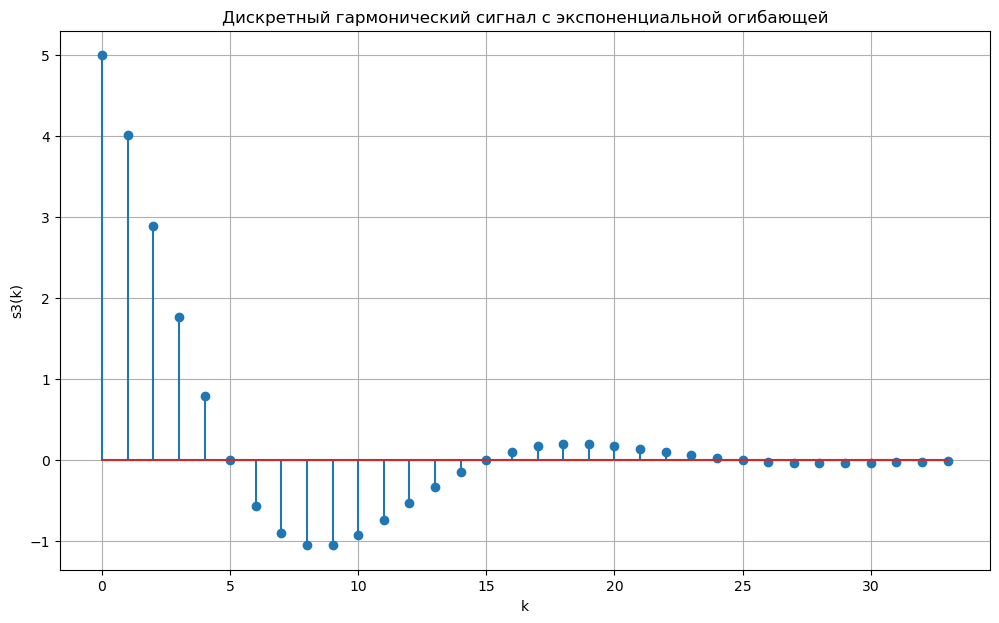

In [100]:
n_int = np.arange(N)
s3_discrete = C * np.cos(w0 * n_int)
s3_envelope = np.abs(a)**n_int
s3 = s3_discrete * s3_envelope

plt.figure(figsize=(12,7))
plt.title("Дискретный гармонический сигнал с экспоненциальной огибающей")
plt.xlabel("k")
plt.ylabel("s3(k)")
plt.stem(n_int, s3)
plt.grid(True)


### Задание 4.
Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды U и длительности $ n_{\text{imp}} $ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

**Пояснение:<br>**
Условие, что период последовательности вдвое больше длительности импулься означает, что первую половину периодна последовательность будет иметь значение, равное амплитуде *U*, а вторую половину периода последовательность будет равняться нулю. Таким образом, для моделирования последовательности используем генератор с условием, что, если номер отсчета по модулю значения периода меньше его половины, то амплитуда последовательности равна *U* и нулю в противном случае. Полученный генератор применяем на интервале $ [0,\ 5T].$


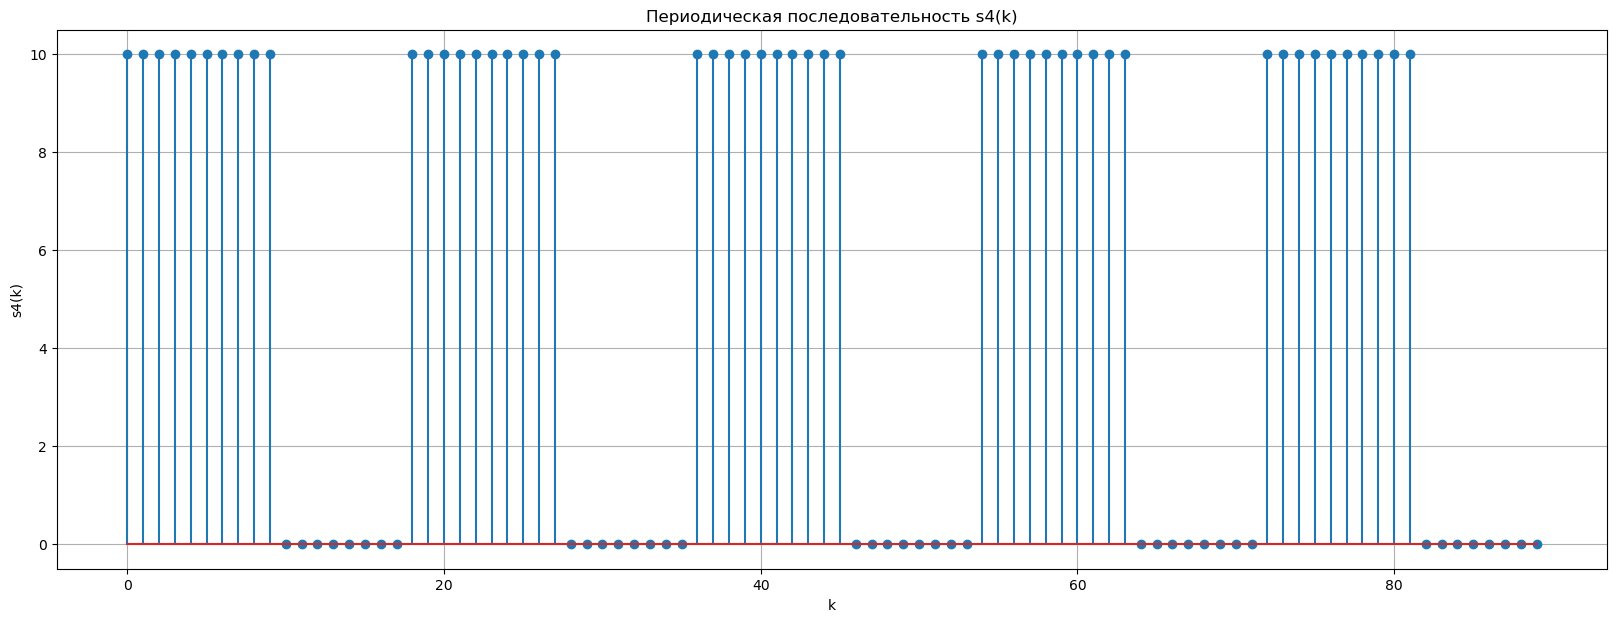

In [101]:
T = 2 * n_imp  
n_int = np.arange(5 * T)
s4 = [U if k % T <= T / 2 else 0 for k in n_int]

plt.figure(figsize=(20,7))
plt.title("Периодическая последовательность s4(k)")
plt.xlabel("k")
plt.ylabel("s4(k)")
plt.stem(n_int, s4)
plt.grid(True)

## Выводы
В ходе выполнения лабораторной работы был изучен процесс построения сигнала с помощью линейных комбинаций дискретных сигналов. Кроме того, в ходе построения различных типов сигналов, были получены практические навыки моделярования с использованием програмных средств, а именно язык программирования python, библиотеки numpy и matplotlib. Были рассмотрены следующие типы сигналов:
- Дискретный прямоугольный импульс
- Дискретный гармоничесеий сигнал с экспоненциальной огибающей

Также были изучены такие характеристики сигналов, как:
- среднее значение
- энергия
- мощность последовательности

Все полученные результаты имеют графики с выводами и требуемыми пояснениями.